# Adding sinusoids
M C M Wright ISVR, University of Southampton

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In the previous notebook we defined a sinusoid as any function that can be written in the form
$$
A \sin\left(\frac{2\pi t}{T} + \phi\right). \tag{1}
$$
We saw that we could either specify the period directly, or by defining $f=1/T$ or $\omega = 2\pi/T$. We could add, for completeness, that $A$, $T$ and $\phi$ are real numbers.

#### Worked example
Show that a cosine is a sinusoid, find its parameters and verify this computationally.

#### Solution
We can see from their graphs, or prove from their definitions, that $\sin(\theta) = \cos(\theta - \pi/2)$, and we want to rewrite $\cos(2\pi t/T)$ in the form of $(1)$, so if we set $\theta - \pi/2 = 2\pi t/T$ then we can write
$$
\cos\left(\frac{2\pi t}{T}\right) = \sin\left(\frac{2\pi t}{T} + \frac{\pi}{2}\right).
$$
Comparing this to $(1)$ shows that this is a sinusoid with parameters $A=1$ and $\phi = \pi/2$.

We can verify this with the following code:

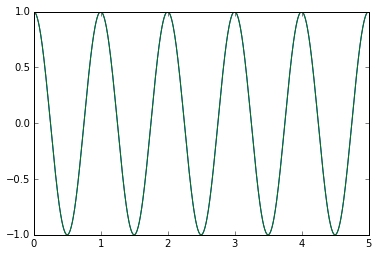

In [2]:
t = linspace(0, 5, 1000)
T = 1
A = 1
phi = pi/2

plot(t,cos(2*pi*t/T), t, A*sin(2*pi*t/T + phi))

#### Exercises
 1. It's rather hard to see that two curves lie on top of one another in a plot like this. Try adding a small amount to one the sinusoids so you can see both lines.
 2. For some pairs of overlying curves it's more useful to move one horizontally rather than vertically. How would you do this?
 3. Another way to show to show that curves overlap is to plot one with a solid line and the other with a dashed line, using contrasting colours such as yellow and magenta. Try this.
 4. If the two expressions are equal for all values of $t$ then their difference should be zero. Try plotting the difference and explain what you see.

#### My notes:
[*Modify this cell for your notes on these exercises*]

## Adding sinusoids with different periods
The sum of two sinusoids is an expression of the form
$$
A_1 \sin\left(\frac{2\pi t}{T_1} + \phi_1\right) + A_2 \sin\left(\frac{2\pi t}{T_2} + \phi_2\right)
$$


#### Worked example A
Plot the sum of two sinusoids with periods of $1$ and $0.1$ seconds, choosing your own amplitudes and phases.

#### Solution

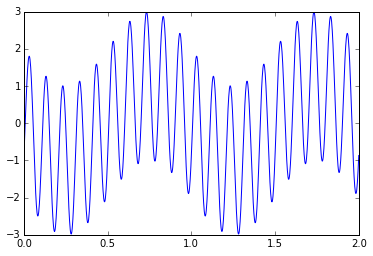

In [3]:
t = linspace(0, 2, 1000)

plot(t,sin(2*pi*t/1 + pi) + 2*sin(2*pi*t/0.1 - pi/7))

We can see both periods ($T = 1$ and $T = 0.1$) and that the amplitude of the high frequency (short period) sinusoid is smaller than the low frequency one.

We're familiar with the concept of 'beats' which occur when we add two sinusoids whose frequencies are close but not identical. We'll plot an example of this, working with frequencies rather than periods.

#### Worked example B
Plot the sum of two sinusoids with frequencies of 10 and 11 Hz.

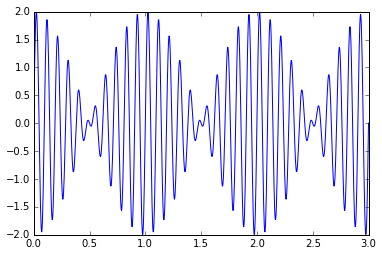

In [4]:
t = linspace(0, 3, 1000)
f1, f2 = 10, 11

plot(t, sin(2*pi*f1*t) + sin(2*pi*f2*t))

The same periods (1s and 0.1s) can be observed in his plot but note how it differs from the one obtained by adding sinusoids with these periods. Have we created a new frequency by adding two sinusoids? 

This question is important and the answer isn't obvious; it depends on what we mean by 'frequency'. To answer it precisely we first need o answer a related question: 

## What is the period of the sum of two periodic functions?
Formally, if we have two periodic functions

$$ 
y_1(t) = y_1(t + T_1) \quad \text{and} \quad y_2(t) = y_2(t + T_2)
$$ 

then what is the smallest $T$ that will satisfy 

$$
y_1(t) + y_2(t) = y_1(t+T) + y_2(t+T)\;?
$$

This equation will be satisfied if $T$ is both an integer multiple of $T_1$ and an integer multiple of $T_2$, i.e. if there exist integers $m$ and $n$ such that 

$$
T = mT_1 = nT_2. \tag{2}
$$ 

They might not exist (for example if $T_2 = \sqrt{2}\,T_1$) in which case $y_1(t)+y_2(t)$ will never repeat.

If they do exist then we can rearrange $(2)$ so that we have

$$
\frac{m}{n} = \frac{T_2}{T_1} = \frac{f_1}{f_2},
$$

where $f_1 = 1/T_1$, $f_2 = 1/T_2$ are the frequencies corresponding to the periods. So if the ratio of periods (and hence the ratio of frequencies) is a *rational number* then the sum of the functions will be periodic, and if $m/n$ is in its lowest form, i.e. all common factors have been cancelled out, then the resulting period is given by $(2)$, and the frequency $f=1/T$ is given by

$$
f = nf_1 = mf_2.
$$

#### Worked example
What is the period in worked example A above?

#### Solution
 In worked example A we have $T_1 = 1$ and $T_2 = 0.1$ so $(2)$ is satisfied by $m=1$ and $n=10$ and gives $T = 1$. We can verify this result with the following code: 

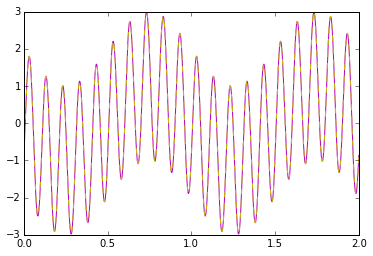

In [6]:
def ex_A(t):
    return sin(2*pi*t/1 + pi) + 2*sin(2*pi*t/0.1 - pi/7)

t = linspace(0, 2, 1000)
plot(t, ex_A(t), 'm-', t, ex_A(t + 1), 'y--')

#### Exercises
 1. Do the same for the worked example B above.
 
 2. The reasoning above applies to all periodic functions, not just sinusoids. Issue the command `import scipy.signal` and use the functions `scipy.signal.sawtooth()` and `scipy.signal.square()` to verify that these examples still work when adding a sawtooth wave to a square wave.

## Series of sinusoids

Suppose we take a sinusoid with a given frequency $f$, and add to it other sinusoids whose frequencies are integer multiples of $f$; what can we say about the resulting function?

We could write such a sum like this:

$$ 
y(t) = \sum_{n=1}^N A_n \sin(2\pi n f t + \phi_n), \tag{3}
$$

which, as we shall soon see, is very nearly a Fourier series. So $A_1$ is the amplitude of the term with frequency $f$, $A_2$ is the amplitude of the term with frequency $2f$ and so on. We can construct such a sum from a list of $A_n$ and $\phi_n$ values quite easily, though we need to be careful about the fact that Python array indexes start from 0.

#### Worked example
Calculate $(3)$ when $f = 440$, $N = 5$, $A_n = \{1, 0.5, 1, 2, 0.3\}$ and $\phi_n = 0$.

#### Solution
We'll use a `for` loop, create an index $m = n-1$ and use that to index the parameters of the components.

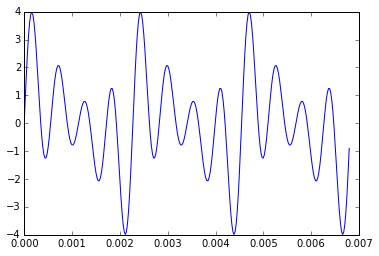

In [7]:
N = 5
A = [1, 0.5, 1, 2, 0.3]
phi = [0, 0, 0, 0, 0]

f = 440.0
t = arange(0, 3/f, 1.0/(N*f*20)) # 3 periods of f, 20 samples per period at highest frequency

y = zeros_like(t)

for m in range(N):
    n = m + 1
    y += A[m]*sin(2*pi*f*n*t + phi[m])

plot(t, y)

Alternatively we could use `meshgrid()`.

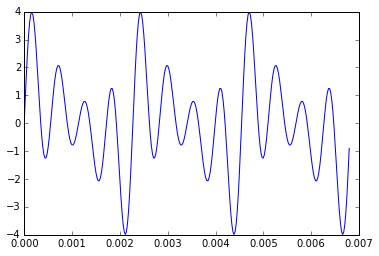

In [8]:
N = 5
A = array([1, 0.5, 1, 2, 0.3])
phi = array([0, 0, 0, 0, 0])

f = 440.0
n, t = meshgrid(arange(1,N + 1),
                arange(0, 3/f, 1.0/(N*f*20)))
m = n - 1

y_components = A[m]*sin(2*pi*f*n*t + phi[m])

plot(t[:,0], sum(y_components, axis=1))

By omitting the `sum()` function on the last line we can plot the components. Try this, and then change the code back. 

[*hint, make a copy of the line you want to change and turn it into a comment so you've still got the original.*]

Because each component has a frequency that is an integer multiple $n$ of the fundamental frequency $f$ the result will always have period $1/f$. We can test this by looking at worked examples A and B, in which we added two sinusoids; they'rere in the form of $(3)$. 

For worked example A we have periods of 1 and 0.1 seconds, so we have frequencies of 1 and 10 Hz. The fundamental frequency is $f = 1$, $N = 10$, the $A_n = \{1, 0, 0, 0, 0, 0, 0, 0, 0, 2\}$ and the $\phi_n = \{\pi, 0, 0, 0, 0, 0, 0, 0, 0, -\pi/7\}$.

For worked example B we have frequencies of 10 and 11 Hz which, as we showed above, also gives a fundamental frequency of $f = 1\,\mbox{Hz}$. We have $N = 11$, the $A_n = \{0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1\}$ and the $\phi_n = \{0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\}$.

#### Exercise
Modify the code cell above to verify both these statements.

## Acoustical notes
 - When we listen to periodic signals we're not usually sensitive to the phase of their components so changing the $\phi_n$ in $(3)$ won't usually affect the 'timbre' of the sound.
 - Musical notes whose periods satisfy $(2)$ are said to form 'just' intervals, for example a just major third has fundamental frequencies in the ratio 5/4. Such intervals, however, are rarely used in modern music.
 - When two frequencies 'beat' it doen't actually produce a component at the beat frequency, so $A_1 = 0$ in the second example above.

## Summary
[Edit this cell to make a summary of everything you've learned from this notebook.]